In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.math import logical_not, logical_xor
import pylab
import numpy as np
from tensorflow.sparse import SparseTensor, to_dense, reorder
%matplotlib inline

tf.Tensor(b'It works!', shape=(), dtype=string)
You have version 2.3.0


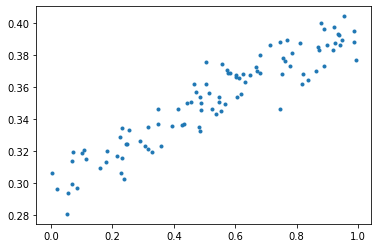

In [136]:
# PROBLEM 1
# Copied from 0_test_install.ipynb
hello = tf.constant('It works!')
print(hello)
print("You have version %s" % tf.__version__)

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

In [37]:
# PROBLEM 2
# Using tensorflow logical function, as discussed: https://piazza.com/class/kef7vljj6ju3rv?cid=8
def xnor(x1, x2):
    '''Emulates XNOR gate, using tensorflow logical_not and logical_xor methods. Converts tensor result boolean. Returns boolean.'''
    return bool(logical_not(logical_xor(x1, x2)).numpy())

x1, x2 = tf.constant(False), tf.constant(False)
result = xnor(x1, x2)
print(result)

True


In [38]:
one = tf.constant(1)
zero = tf.constant(0)
bias = tf.constant(1)

In [40]:
# PROBLEM 3 - AND
# Inputs: x1, x2 as left-hand side of truth table, plus bias
X_train_and = tf.constant([[0,0,1],[0,1,1],[1,0,1],[1,1,1]], "float32")
y_train_and = tf.constant([[0],[0],[0],[1]], "float32")

model_and = Sequential([
    Dense(16, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_and.compile(loss='mean_squared_error', optimizer='adam', loss_weights=[20,20,-30])
model_and.fit(X_train_and, y_train_and, epochs=1000, verbose=0)

def AND(x1, x2):
    vals = [[x1,x2,bias]]
    x_input = tf.concat(axis=0, values=[vals])
    return model_and.predict(x_input)[0][0]

and_res = AND(one, one)
print(and_res)

0.8602776


In [42]:
# PROBLEM 3 - OR
# Inputs: x1, x2 as left-hand side of truth table, plus bias
X_train_or = tf.constant([[0,0,1],[0,1,1],[1,0,1],[1,1,1]], "float32")
y_train_or = tf.constant([[0],[1],[1],[1]], "float32")

model_or = Sequential([
    Dense(16, input_dim=3, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_or.compile(loss='mean_squared_error', optimizer='adam', loss_weights=[20,20,-10])
model_or.fit(X_train_or, y_train_or, epochs=1000, verbose=0)

def OR(x1, x2):
    vals = [[x1,x2,bias]]
    x_input = tf.concat(axis=0, values=[vals])
    return model_or.predict(x_input)[0][0]

or_res = OR(zero, zero)
print(or_res)

0.103563756


In [72]:
# PROBLEM 3 - NOT
# Inputs: x1, as the left-hand side of truth table, plus bias
X_train_not = tf.constant([[0,1],[1,1]], "float32")
y_train_not = tf.constant([[1],[0]], "float32")

model_not = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_not.compile(loss='mean_squared_error', optimizer='adam', loss_weights=[20,-20])
model_not.fit(X_train_not, y_train_not, epochs=1000, verbose=0)

def NOT(x1):
    vals = [[x1,bias]]
    x_input = tf.concat(axis=0, values=[vals])
    return model_not.predict(x_input)[0][0]

not_res = NOT(zero)
print(not_res)

0.9573912


In [130]:
# PROBLEM 4
def XOR(x1, x2):
    return OR(x1, x2) - AND(x1,x2)

def XNOR(x1, x2):
    res = XOR(x1,x2).round()
    return NOT(res)

In [133]:
test = XNOR(one,one)

0.9573912


In [190]:
# PROBLEM 5
seed = 42
# Generate 5 tuples of integers between 0-3
def getRandInt(minval, maxval):
    return tf.random.uniform(shape=(1,), minval=minval, maxval=maxval, dtype=tf.int32, seed=seed).numpy()[0]

def getIndex():
    row = getRandInt(0,4)
    col = getRandInt(0,4)
    index = [row,col]
    return index

indices = []
values = []
for i in range(5):
    index = getIndex()
    while index in indices:
        index = getIndex()
    indices.append(index)
    
    val = getRandInt(1,11)
    values.append(val)
    
sparse_t = SparseTensor(indices=indices, values=values, dense_shape=(4,4))
dense_t = to_dense(reorder(sparse_t)).numpy()
print(dense_t)

[[0 6 7 0]
 [0 0 7 0]
 [0 0 8 0]
 [0 0 6 0]]


In [257]:
# PROBLEM 6 - NP
# Increase precision to make output more legible
np.set_printoptions(precision=3)
filename = './auto_mpg.csv'
# Columns used (in order):
# Acceleration, Cylinders, Displacement, Horsepower, Model_Year, MPG, Weight
mpg = np.genfromtxt(filename, delimiter=',', usecols=[1,2,3,4,7,8,10], skip_header=True, missing_values=0)
# Get coefficient matrix of column
# print(mpg)
mpg_corrcoef = np.corrcoef(mpg.T)[5]
# Columns with highest coefficient (descending order): Weight, Cylinders, Horsepower, Displacement, Model_Year, Acceleration
print(mpg_corrcoef)


array([ 0.465, -0.812, -0.788, -0.797,  0.717,  1.   , -0.852])